In [1]:
## Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas 
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('poster')
import re
import csv
import json
import time

In [2]:
import mediacloud, json, datetime
mc = mediacloud.api.MediaCloud('7e5510da993cd51097818a48374dff44495cb251f859ec01d61aaae59284fb6c')

## Code to compare two word distributions

In [3]:
q = '+(immigra* OR migrat* OR migrant*) AND +(US OR "united states") and timespans_id:93598'

In [7]:
dist1 = mc.wordCount(q, sample_size=1000)

In [6]:
dist2 = mc.wordCount(q, sample_size=10000)

In [10]:
df1 = pandas.read_json(json.dumps(dist1), orient='records')

In [11]:
df2 = pandas.read_json(json.dumps(dist2), orient='records')

In [ ]:
df1.

### 1)  Immigration topic

In [62]:
q = '+(immigra* OR migrat* OR migrant*) AND +(US OR "united states") and timespans_id:93598'

In [ ]:
start = time.time()

for N in [1000, 10000, 100000]:
    print("\n\n","N",N)
    for m in range(100):
        print("SAMPLE: ", str(m))
        start_s = time.time()
        sample = mc.wordCount(q, sample_size=N)
        print("TIME FOR API: ", str(time.time() - start_s), " SEC")
        path = '../data/sampling/immigration/'+ str(N) + "/sample" + str(m) + ".csv"
        print(path)
        pandas.read_json(json.dumps(sample), orient='records').to_csv(path)
        
print("TOTAL TIME FOR TOPIC: ", time.time() - start)



 N 1000
SAMPLE:  0
TIME FOR API:  5.902997970581055  SEC
../data/sampling/immigration/1000sample0.csv
SAMPLE:  1
TIME FOR API:  5.648554086685181  SEC
../data/sampling/immigration/1000sample1.csv
SAMPLE:  2
TIME FOR API:  6.032450914382935  SEC
../data/sampling/immigration/1000sample2.csv
SAMPLE:  3
TIME FOR API:  6.153336048126221  SEC
../data/sampling/immigration/1000sample3.csv
SAMPLE:  4
TIME FOR API:  5.312669992446899  SEC
../data/sampling/immigration/1000sample4.csv
SAMPLE:  5
TIME FOR API:  5.081545114517212  SEC
../data/sampling/immigration/1000sample5.csv
SAMPLE:  6
TIME FOR API:  5.631569147109985  SEC
../data/sampling/immigration/1000sample6.csv
SAMPLE:  7
TIME FOR API:  5.198685884475708  SEC
../data/sampling/immigration/1000sample7.csv
SAMPLE:  8
TIME FOR API:  4.590003252029419  SEC
../data/sampling/immigration/1000sample8.csv
SAMPLE:  9
TIME FOR API:  4.943007946014404  SEC
../data/sampling/immigration/1000sample9.csv
SAMPLE:  10
TIME FOR API:  4.393803119659424  SEC


TIME FOR API:  3.9252841472625732  SEC
../data/sampling/immigration/1000sample86.csv
SAMPLE:  87
TIME FOR API:  3.88474702835083  SEC
../data/sampling/immigration/1000sample87.csv
SAMPLE:  88
TIME FOR API:  4.62110710144043  SEC
../data/sampling/immigration/1000sample88.csv
SAMPLE:  89
TIME FOR API:  5.660735130310059  SEC
../data/sampling/immigration/1000sample89.csv
SAMPLE:  90
TIME FOR API:  4.383193731307983  SEC
../data/sampling/immigration/1000sample90.csv
SAMPLE:  91
TIME FOR API:  4.4091432094573975  SEC
../data/sampling/immigration/1000sample91.csv
SAMPLE:  92
TIME FOR API:  4.365886926651001  SEC
../data/sampling/immigration/1000sample92.csv
SAMPLE:  93
TIME FOR API:  4.283018112182617  SEC
../data/sampling/immigration/1000sample93.csv
SAMPLE:  94
TIME FOR API:  3.9464869499206543  SEC
../data/sampling/immigration/1000sample94.csv
SAMPLE:  95
TIME FOR API:  4.121248960494995  SEC
../data/sampling/immigration/1000sample95.csv
SAMPLE:  96
TIME FOR API:  4.8343400955200195  SEC


TIME FOR API:  35.50560116767883  SEC
../data/sampling/immigration/10000sample71.csv
SAMPLE:  72
TIME FOR API:  34.30009913444519  SEC
../data/sampling/immigration/10000sample72.csv
SAMPLE:  73
TIME FOR API:  35.31781578063965  SEC
../data/sampling/immigration/10000sample73.csv
SAMPLE:  74
TIME FOR API:  35.27568006515503  SEC
../data/sampling/immigration/10000sample74.csv
SAMPLE:  75
TIME FOR API:  35.02087211608887  SEC
../data/sampling/immigration/10000sample75.csv
SAMPLE:  76
TIME FOR API:  29.946683883666992  SEC
../data/sampling/immigration/10000sample76.csv
SAMPLE:  77
TIME FOR API:  30.34129285812378  SEC
../data/sampling/immigration/10000sample77.csv
SAMPLE:  78
TIME FOR API:  31.584141969680786  SEC
../data/sampling/immigration/10000sample78.csv
SAMPLE:  79
TIME FOR API:  30.8438401222229  SEC
../data/sampling/immigration/10000sample79.csv
SAMPLE:  80
TIME FOR API:  28.86312198638916  SEC
../data/sampling/immigration/10000sample80.csv
SAMPLE:  81
TIME FOR API:  31.49276089668

In [69]:
print(54)

54


In [15]:
one_k = mc.wordCount('+(immigra* OR migrat* OR migrant*) AND +(US OR "united states") and timespans_id:93598', sample_size=1000)

In [14]:
ten_k = mc.wordCount('+(immigra* OR migrat* OR migrant*) AND +(US OR "united states") and timespans_id:93598', sample_size=10000)

In [16]:
hundred_k = mc.wordCount('+(immigra* OR migrat* OR migrant*) AND +(US OR "united states") and timespans_id:93598', sample_size=100000)

In [19]:
print(len(one_k))
print(len(ten_k))
print(len(hundred_k))

500
500
500


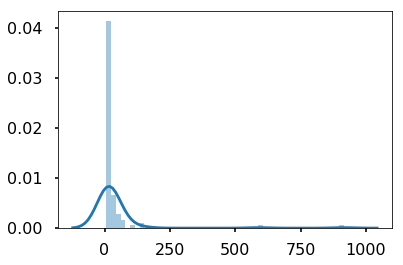

In [59]:
sns.distplot(list(pandas.read_json(json.dumps(one_k), orient='records').head(100)['count']))

### 2) ebola


In [21]:
len(mc.wordCount('ebola and timespans_id:150307', sample_size=1000)  )

500

'[{"count": 914, "stem": "immigr", "term": "immigration"}, {"count": 590, "stem": "unit", "term": "united"}, {"count": 141, "stem": "migrant", "term": "migrants"}, {"count": 139, "stem": "illeg", "term": "illegal"}, {"count": 115, "stem": "trump", "term": "trump"}, {"count": 78, "stem": "migrat", "term": "migration"}, {"count": 72, "stem": "mexico", "term": "mexico"}, {"count": 69, "stem": "american", "term": "american"}, {"count": 56, "stem": "deport", "term": "deportation"}, {"count": 53, "stem": "muslim", "term": "muslim"}, {"count": 49, "stem": "mexican", "term": "mexican"}, {"count": 49, "stem": "america", "term": "america"}, {"count": 45, "stem": "visa", "term": "visa"}, {"count": 43, "stem": "children", "term": "children"}, {"count": 43, "stem": "donald", "term": "donald"}, {"count": 42, "stem": "undocu", "term": "undocumented"}, {"count": 41, "stem": "refuge", "term": "refugees"}, {"count": 38, "stem": "citizenship", "term": "citizenship"}, {"count": 36, "stem": "obama", "term"